# Set-up

## Imports

In [78]:
# --- Standard library ---
from datetime import datetime

# --- Scientific computation ---
import numpy as np

# --- Data handling and visualization ---
import pandas as pd  # Dataframe tools
from tabulate import tabulate  # Pretty printing for dataframes

import seaborn as sns  # Easier plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

## Globals

In [79]:
today = datetime.today().strftime("%Y%m%d")

# --- Visualization ---
rc_dict = {
  "savefig.dpi": 900,  # Saved figure dots-per-inch. 600 is "HD"
  "savefig.facecolor": "white",  # This, combined with transparent setting, keeps saved figs from looking like trash on dark backgrounds 
  "savefig.transparent": False,
  "figure.figsize": (14, 10),  # Default (width, height) of figure
}
plt.rcParams.update(rc_dict)

# Data preprocessing

In [80]:
# Load dataframes
df_R = pd.concat([
    pd.read_parquet("../../results/dataframes/dataframe_EMB_ex10-Rv1.0_DK_20221010.parquet"),  # first couple layers
    pd.read_parquet("../../results/dataframes/dataframe_EMB_ex10-Rv1.0_DK_20221012.parquet"),  # remaining layers
])
df_S = pd.concat([
    pd.read_parquet("../../results/dataframes/dataframe_EMB_ex10-Sv1.0-inverse_DK_20221010.parquet"),  # gamma, inverse
    pd.read_parquet("../../results/dataframes/dataframe_EMB_ex10-Sv1.0-negexp_DK_20221010.parquet"),  # gamma, negexp
    pd.read_parquet("../../results/dataframes/dataframe_EMB_ex10-Sv1.0-mu-inverse_DK_20221010.parquet"),  # mu, inverse
    pd.read_parquet("../../results/dataframes/dataframe_EMB_ex10-Sv1.0-mu-negexp_DK_20221010.parquet"),  # mu, negexp
])

df_S_old = pd.read_parquet("../../results/dataframes/_failed/dataframe_EMB_ex06v2.0-gamma_DK_20220929.parquet")

In [81]:
# Reindex after concatenation
df_S.index = range(len(df_S))
df_R.index = range(len(df_R))

# Cast as correct type
df_S = df_S.astype({
    'avg_k': 'int8',
    'rep': 'int8',
    'mu': 'float32',
    'gamma': 'float32',
    'pfi': 'float32',
    'metric': 'category',
})
df_S_old = df_S_old.astype({
    'N': 'int8',
    'avgk': 'int8',
    'rep': 'int8',
    'mu': 'float32',
    'gamma': 'float32',
    'tau': 'float32',
    'pfi': 'float32',
    'metric': 'category',
})

# Figures

## ex10-S

<Figure size 1008x720 with 0 Axes>

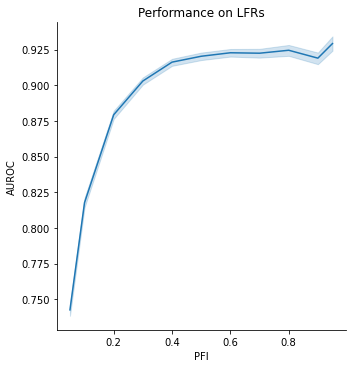

In [82]:
plt.figure()
sns.relplot(
    data=df_S, kind="line",
    x="pfi", y="AUROC",
)

plt.title("Performance on LFRs")
plt.ylabel("AUROC")
plt.xlabel("PFI")

plt.savefig(f"../../results/plots/line_auroc-pfi_EMB_ex10-S_DK_{today}.png")

<Figure size 1008x720 with 0 Axes>

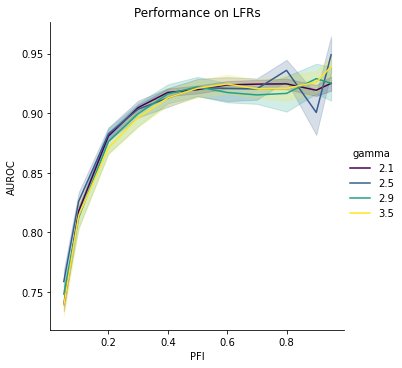

In [83]:
plt.figure()
sns.relplot(
    data=df_S, kind="line",
    x="pfi", y="AUROC",
    hue="gamma", palette="viridis",
)

plt.title("Performance on LFRs")
plt.ylabel("AUROC")
plt.xlabel("PFI")

plt.savefig(f"../../results/plots/line_auroc-pfi-gamma_EMB_ex10-S_DK_{today}.png")

<Figure size 1008x720 with 0 Axes>

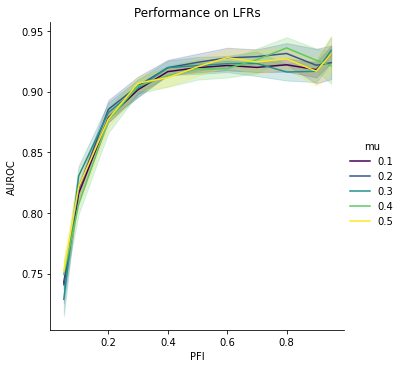

In [84]:
plt.figure()
sns.relplot(
    data=df_S, kind="line",
    x="pfi", y="AUROC",
    hue="mu", palette="viridis",
)

plt.title("Performance on LFRs")
plt.ylabel("AUROC")
plt.xlabel("PFI")

plt.savefig(f"../../results/plots/line_auroc-pfi-mu_EMB_ex10-S_DK_{today}.png")

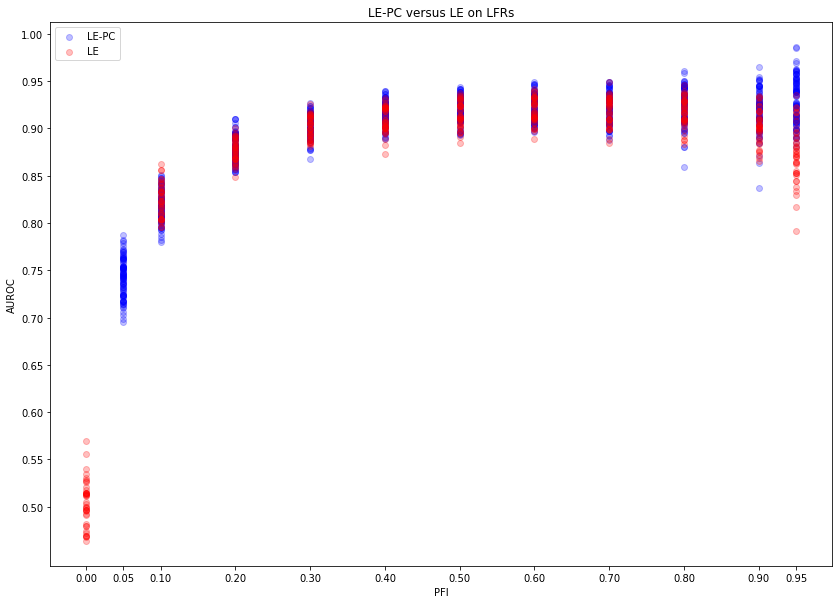

In [85]:
plt.figure()

plt.scatter(
    df_S["pfi"], df_S["AUROC"],
    color="blue", label="LE-PC",
    alpha=0.25
)
plt.scatter(
    df_S_old["pfi"], df_S_old["AUROC"],
    color="red", label="LE",
    alpha=0.25
)

plt.xticks(list(set(df_S["pfi"]) | set(df_S_old["pfi"])))
plt.yticks(np.linspace(0.5, 1.0, 11, endpoint=True))
plt.legend()

plt.xlabel("PFI")
plt.ylabel("AUROC")
plt.title("LE-PC versus LE on LFRs")

plt.savefig(f"../../results/plots/scatter_auroc-pfi_EMB_ex06S-ex10-S_DK_{today}.png")

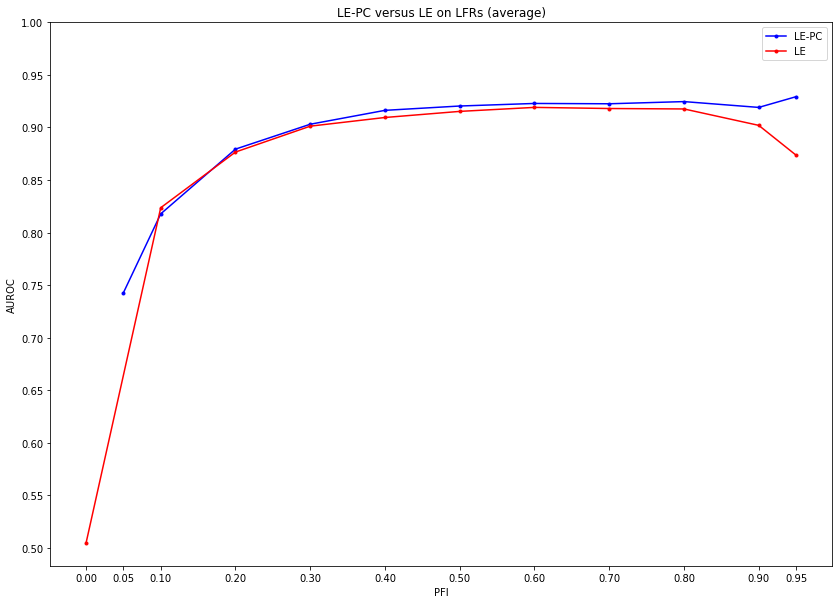

In [86]:
df_S_ = df_S.groupby("pfi").mean()
df_S_.index = sorted([float(i) for i in df_S_.index])
df_S_old_ = df_S_old.groupby("pfi").mean()
df_S_old_.index = sorted([float(i) for i in df_S_old_.index])
plt.figure()

plt.plot(
    df_S_.index, df_S_["AUROC"],
    color="blue", label="LE-PC",
    marker="."
)
plt.plot(
    df_S_old_.index, df_S_old_["AUROC"],
    color="red", label="LE",
    marker="."
)

plt.xticks(list(set(df_S["pfi"]) | set(df_S_old["pfi"])))
plt.yticks(np.linspace(0.5, 1.0, 11, endpoint=True))
plt.legend()

plt.xlabel("PFI")
plt.ylabel("AUROC")
plt.title("LE-PC versus LE on LFRs (average)")

plt.savefig(f"../../results/plots/line_auroc-pfi_EMB_ex06S-ex10-S_DK_{today}.png")

## ex10-R

<Figure size 1008x720 with 0 Axes>

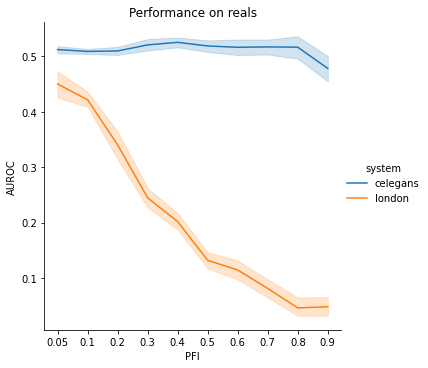

In [87]:
plt.figure()
sns.relplot(
    data=df_R, kind="line",
    x="pfi", y="AUROC",
    hue="system",
)

plt.title("Performance on reals")
plt.ylabel("AUROC")
plt.xlabel("PFI")

plt.savefig(f"../../results/plots/line_auroc-pfi_EMB_ex10-R_DK_{today}.png")

<Figure size 1008x720 with 0 Axes>

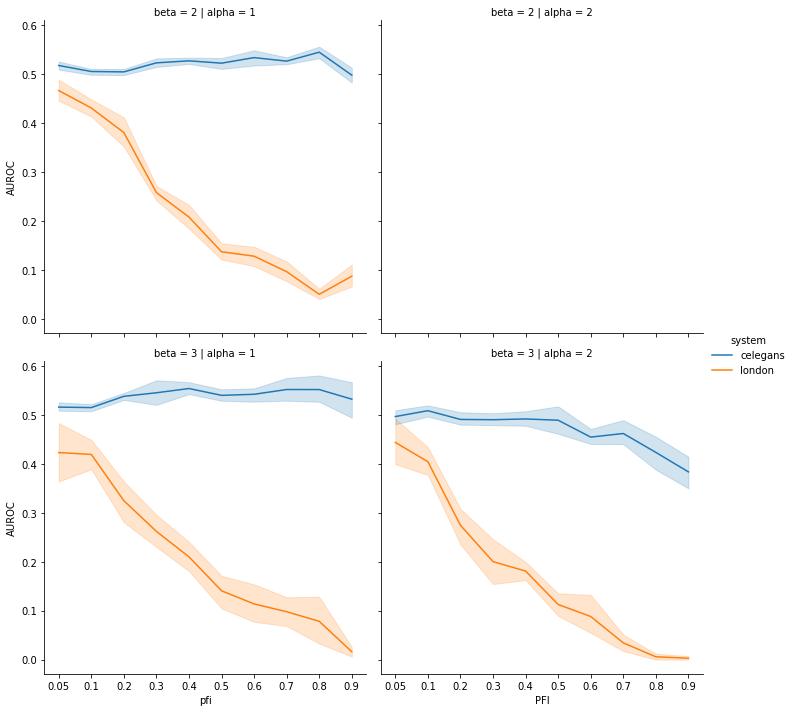

In [89]:
plt.figure()
sns.relplot(
    data=df_R, kind="line",
    x="pfi", y="AUROC",
    hue="system",
    col="alpha", row="beta"
)

plt.ylabel("AUROC")
plt.xlabel("PFI")

plt.savefig(f"../../results/plots/line_auroc-pfi-layers_EMB_ex10-R_DK_{today}.png")